# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37degreesC or 98.6degreesF for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

In [1]:
<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

SyntaxError: invalid syntax (<ipython-input-1-07146b5a2c29>, line 1)

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal?

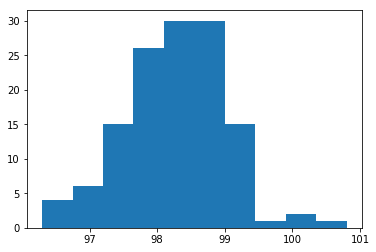

In [2]:
import matplotlib.pyplot as plt

body_temperature = df['temperature']
plt.hist(body_temperature)
plt.show()

Yes, the distribution of body temperatures is normal.

### 2. Is the sample size large? Are the observations independent?

In [36]:
len(df)

130

The sample size is 130.

"What is the 'Central Limit Theorem - CLT'
The central limit theorem (CLT) is a statistical theory that states that given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population. Furthermore, all of the samples will follow an approximate normal distribution pattern, with all variances being approximately equal to the variance of the population divided by each sample's size.
Read more: Central Limit Theorem (CLT) http://www.investopedia.com/terms/c/central_limit_theorem.asp#ixzz4fxPonJhk "

"As a general rule, sample sizes equal to or greater than 30 are considered sufficient for the central limit theorem to hold, meaning the distribution of the sample means is fairly normally distributed.
Read more: Central Limit Theorem (CLT) http://www.investopedia.com/terms/c/central_limit_theorem.asp#ixzz4fxQf6nn3"

To sum, this means in order for the CLT to hold true, then the sample size in this example (which is 130) should be greater than 30. In this case, the sample size of 130 is considered to be large.

Independent Observations
"Two observations are independent if the occurrence of one observation provides no information about the occurrence of the other observation.  A simple example is measuring the height of everyone in your sample at a single point in time.  These should be unrelated observations.  However, if you were to measure one child's height over time, these observations would be dependent because the height at each time point would affect the height at future time points."
Read more: Statistical Terms Dictionary http://www.nedarc.org/statisticalHelp/statisticalTermsDictionary.html

In this case, one person's body temperature will not affect another person's body temperature. These observations are independent.

## 3. Is the true population mean really 98.6 degrees F?
- Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the t or z statistic?
- Now try using the other test. How is the result be different? Why?

The one-sample test should be used because we only want to check if the sample mean is greater than or less than the population mean. We do not care to check for the difference between two types of groups (which is where we would a two-sample type test).

The rule is if the sample size, n, is > 30, then the z-statistic is used. If n < 30, then the t-statistic is used. 
In this case, since n is 130, we should use  the z-statistic.

T-statistic:

In [45]:
import numpy as np
sample_mean=np.mean(body_temperature)
sample_mean

98.24923076923078

In [46]:
sample_std=np.std(body_temperature)
sample_std

0.7303577789050377

In [47]:
std_samp_dist=(sample_std/np.sqrt(130))
std_samp_dist

0.064056614695193359

In [48]:
# Use the multiplier number for 95% confidence interval, 1.96, to calculate the interval
# http://sites.stat.psu.edu/~ajw13/stat200_upd/07_CI/03_CI_CI.htm
margin_error=std_samp_dist*1.96

confidence_interval=(sample_mean-margin_error, sample_mean+margin_error)
confidence_interval

(98.123679804428193, 98.374781734033363)

Z-statistic:

note: the d.f. should be 130-1=129, but  t-tables has no value for d.f. = 129
we can use 100 d.f. instead, with a multiplier of 1.66.

In [53]:
margin_error_t=std_samp_dist*1.66
confidence_interval_t=(sample_mean-margin_error_t, sample_mean+margin_error_t)
confidence_interval_t

(98.142896788836751, 98.355564749624804)

Difference:

Z-statistic provides a range that is a bit smaller than the calculation derived using the T-statistic.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval.

The margin of error is calculated by:
- finding sample mean of the sampling distribution
- finding the sample standard deviation
- divide the sample standard deviation by square root of the sampling size (n)
- figure out margin of error by multiping confidence interval with z-statistic

In [54]:
margin_error

0.12555096480257899

If the temperature measures outside the confidence_interval range, then the temperature is considered abnormal.

In [55]:
confidence_interval

(98.123679804428193, 98.374781734033363)

## 5. Is there a significant difference between males and females in normal temperature?
- What test did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [15]:
women = df[df['gender']=='F']
women

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0
9,98.6,F,86.0
10,98.8,F,89.0
11,96.7,F,62.0
13,98.7,F,79.0
14,97.8,F,77.0


In [56]:
len(women)

65

In [26]:
men = df[df['gender']=='M']
men

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0
17,98.2,M,64.0
19,99.4,M,70.0
21,98.2,M,71.0
22,98.6,M,70.0
23,98.4,M,68.0


In [57]:
len(men)

65

I'm using Hypothesis test for the difference of means since the sample size for both men and women in the group is 65, which is larger than 30.

In [58]:
women_mean = np.mean(women['temperature'])
women_mean

98.39384615384613

In [59]:
men_mean = np.mean(men['temperature'])
men_mean

98.1046153846154

In [60]:
women_std = np.std(women['temperature'])
women_std

0.7377464486428966

In [61]:
men_std = np.std(men['temperature'])
men_std

0.6933598841828696

In [62]:
mean_diff = women_mean - men_mean
mean_diff

0.289230769230727

In [63]:
w=(women_std**2)/65
m=(men_std**2)/65
diff_std=np.sqrt(w+m)
diff_std

0.12557668521231213

In [64]:
diff_std*1.96

0.24613030301613179

If we assume the temperatures between men and women are equal, then the z-score should reflect a high probability of
having a mean difference of .289. However, in this case, it is less than 5%, which means we have to reject the assumption in favor of the altnerative.

Temperatures between men and women are not equal. 